1. 기계학습 프로세스에 대해 간략하게 설명하시오
    a) 여러 데이터들을 기계(컴퓨터)에 학습시켜 결과를 예측하는 모델을 만드는 것으로
데이터셋 준비 -> 데이터전처리 -> 학습 -> 검증 으로 되어있다.

2. 기계학습에 사용되는 데이터셋에 대해 설명하세요
    a) feature와 target으로 나뉘며 target은 예측될 데이터로 중복이 존재하지 않는다.

3. 지도학습의 특징을 설명하세요
    a) 

4. 데이터 전처리 중 처음 데이터 수집후 ...
    a) 이상치 제거, nan값 확인, 중복값 제거 등등

5. 모델 개념을 설명해 주세요
    a) 학습을 시켜 결과를 내는 방법이며 수치를 예측하는 회귀와 범위를 예측하는 분류 등이 존재한다.

6. 모델의 결과 값이 수치를 예측해주는 기계학습은?
    a) 회귀(regression)

7. 모델 파라미터는 무엇인가요?
    a) 그 모델을 나타낼 수 있는 여러가지 알고리즘에 따른 종류

8. KNN 알고리즘에 대해 설명
    a) 주어진 feature 데이터 기준으로 가장 가까운 거리의 데이터의 수치나 범위를 파악하는 알고리즘

9. 하이퍼 파라미터는 무엇인가?
    a)

10. Regression의 성능평가 지표들을 설명
    a1) r2score - 
    a2) mae
    a3) rmse

11. LinearRegression 알고리즘에 대해 설명
    a) 나열된 데이터셋에 가장 가까운 형태로 직선을 그어 데이터들과의 거리를 측정하는 알고리즘으로 feature로 직선위의 target을 예측한다.

12. Classification의 성능평가 지표들을 설명하세요
    a1) f1score

13. 피쳐공학에 대해 설명하세요.
    a) 피쳐(feature)를 학습시켜 타겟(target)을 도출해 내는것

14. LogisticRegression 알고리즘에 대해 설명해 주세요
    a) 

15. 과대적합/과소적합에 대해 설명
    a. 훈련에 사용된 데이터(train_x)의 모델예측값이 테스트데이터를 넣어서 나오는 예측값보다 더 정확도가 높을때를 과대적합이라 하며 train_x 데이터의 분포가 모여있거나 그 데이터 양이 너무 적을 경우 발생할 수 있다.
    a2) 과소적합은 훈련데이터와 테스트데이터의 예측값이 모두 낮을때를 말하며 데이터 양이 너무나 방대하거나 분포가 너무 퍼져 있을경우 발생한다. 

16. iris 데이터셋으로 분류/회귀 모델 만들기 및 성능평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
irisDF.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [13]:
classify_iris = irisDF.copy()

In [18]:
classify_iris.species.replace({'setosa': 0, 'versicolor': 1, 'virginica':2}, inplace=True)
classify_iris.species.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

### 분류모델
- feature: 'petal_length', 'petal_width'
- target: 'species'

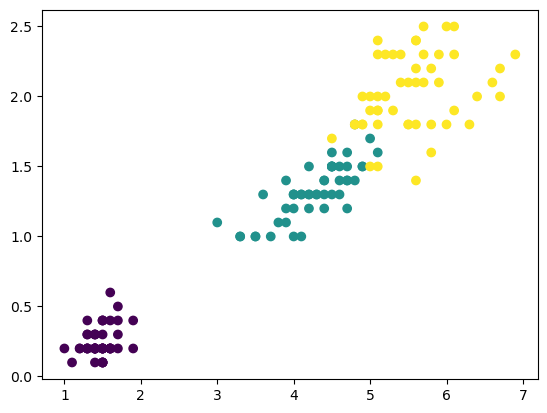

In [24]:
# 시각화
plt.scatter(classify_iris.petal_length, classify_iris.petal_width, c=classify_iris.species)
plt.show()

In [25]:
featureDF = classify_iris[['petal_length','petal_width']]
featureDF

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [26]:
targetDF = classify_iris[['species']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, random_state=17)

스케일링

In [28]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [34]:
k_max = len(y_train
            )
k_max

120

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array 

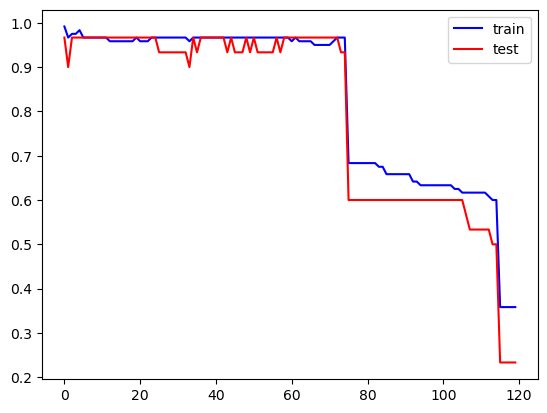

In [36]:
train_score_list = []
test_score_list = []
for k in range(1,k_max+1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_x_train, y_train)
    
    f1_score_train = model.score(scaled_x_train, y_train)
    f1_score_test = model.score(scaled_x_test, y_test)
    train_score_list.append(f1_score_train)
    test_score_list.append(f1_score_test)

plt.plot(train_score_list, label='train', color='blue')
plt.plot(test_score_list, label='test', color='red')
plt.legend(loc='best')
plt.show()


In [38]:
print(test_score_list.index(max(test_score_list)))
print(max(test_score_list))

0
0.9666666666666667


In [40]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(scaled_x_train, y_train)
y_pred = model.predict(scaled_x_test)

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### 회귀

In [50]:
regression_iris = irisDF.copy()

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
regression_iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
regression_iris = regression_iris[regression_iris.species == 'virginica'].reset_index(drop=True)

In [53]:
regression_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,3.3,6.0,2.5,virginica
1,5.8,2.7,5.1,1.9,virginica
2,7.1,3.0,5.9,2.1,virginica
3,6.3,2.9,5.6,1.8,virginica
4,6.5,3.0,5.8,2.2,virginica
5,7.6,3.0,6.6,2.1,virginica
6,4.9,2.5,4.5,1.7,virginica
7,7.3,2.9,6.3,1.8,virginica
8,6.7,2.5,5.8,1.8,virginica
9,7.2,3.6,6.1,2.5,virginica


In [54]:
featureDF = regression_iris[['sepal_width', 'sepal_length', 'petal_width']]
targetDF = regression_iris[['petal_length']]